In [3]:
#semoga kali ini jadi

import pandas as pd
import numpy as np

#load data
df_prop = pd.read_csv('Dataset UTS_Gasal 2425.csv')
df_prop.head(10)

,squaremeters,numberofrooms,hasyard,haspool,floors,citycode,citypartrange,numprevowners,made,isnewbuilt,hasstormprotector,basement,attic,garage,hasstorageroom,hasguestroom,price,category
0,75523,3,no,yes,63,9373,3,8,2005,old,yes,4313,9005,956,no,7,7559081.5,Luxury
1,55712,58,no,yes,19,34457,6,8,2021,old,no,2937,8852,135,yes,9,5574642.1,Middle
2,86929,100,yes,no,11,98155,3,4,2003,new,no,6326,4748,654,no,10,8696869.3,Luxury
3,51522,3,no,no,61,9047,8,3,2012,new,yes,632,5792,807,yes,5,5154055.2,Middle
4,96470,74,yes,no,21,92029,4,2,2011,new,yes,5414,1172,716,yes,9,9652258.1,Luxury
5,79770,3,no,yes,69,54812,10,5,2018,old,yes,8871,7117,240,no,7,7986665.8,Luxury
6,75985,60,yes,no,67,6517,6,9,2009,new,yes,4878,281,384,yes,5,7607322.9,Luxury
7,64169,88,no,yes,6,61711,3,9,2011,new,yes,3054,129,726,no,9,6420823.1,Middle
8,92383,12,no,no,78,71982,3,7,2000,old,no,7507,9056,892,yes,1,9244344.0,Luxury
9,95121,46,no,yes,3,9382,7,9,1994,old,no,615,1221,328,no,10,9515440.4,Luxury


In [4]:
df_prop.describe()

,squaremeters,numberofrooms,floors,citycode,citypartrange,numprevowners,made,basement,attic,garage,hasguestroom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.00000,10000.00000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,50.276300,50225.486100,5.510100,5.521700,2005.48850,5033.103900,5028.01060,553.12120,4.99460,4.993448e+06
std,28774.37535,28.816696,28.889171,29006.675799,2.872024,2.856667,9.30809,2876.729545,2894.33221,262.05017,3.17641,2.877424e+06
min,89.00000,1.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,1.00000,100.00000,0.00000,1.031350e+04
25%,25098.50000,25.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,2559.750000,2512.00000,327.75000,2.00000,2.516402e+06
50%,50105.50000,50.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,5092.500000,5045.00000,554.00000,5.00000,5.016180e+06
75%,74609.75000,75.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,7511.250000,7540.50000,777.25000,8.00000,7.469092e+06
max,99999.00000,100.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,10000.000000,10000.00000,1000.00000,10.00000,1.000677e+07


In [5]:
df_prop2 = df_prop.drop('price', axis=1)
df_prop2['category'].value_counts()

category
Basic     4344
Luxury    3065
Middle    2591
Name: count, dtype: int64

In [6]:
print("data null\n", df_prop2.isnull().sum())
print("data kosong\n", df_prop2.empty)
print("data nan\n", df_prop2.isna().sum())


data null
 squaremeters         0
numberofrooms        0
hasyard              0
haspool              0
floors               0
citycode             0
citypartrange        0
numprevowners        0
made                 0
isnewbuilt           0
hasstormprotector    0
basement             0
attic                0
garage               0
hasstorageroom       0
hasguestroom         0
category             0
dtype: int64
data kosong
 False
data nan
 squaremeters         0
numberofrooms        0
hasyard              0
haspool              0
floors               0
citycode             0
citypartrange        0
numprevowners        0
made                 0
isnewbuilt           0
hasstormprotector    0
basement             0
attic                0
garage               0
hasstorageroom       0
hasguestroom         0
category             0
dtype: int64


In [7]:
print("Sebelum drop missing value \n",df_prop2.shape)
df_prop2= df_prop2.dropna(how='any',inplace=False)
print("Sesudah drop missing value \n",df_prop2.shape)

Sebelum drop missing value 
 (10000, 17)
Sesudah drop missing value 
 (10000, 17)


In [8]:
print("sebelum cek duplikat \n",df_prop2.shape)
df_prop3=df_prop2.drop_duplicates(keep='last')
print("sesudah cek duplikat \n",df_prop3.shape)

sebelum cek duplikat 
 (10000, 17)
sesudah cek duplikat 
 (10000, 17)


In [9]:
from sklearn.model_selection import train_test_split
x = df_prop3.drop(columns='category', axis=1)
y = df_prop3['category']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=83)

print(x_train.shape)
print(x_test.shape)

(7000, 16)
(3000, 16)


In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

kolom_kategori=['hasyard','haspool','isnewbuilt','hasstormprotector','hasstorageroom']

transform = make_column_transformer(
    (OneHotEncoder(), kolom_kategori),remainder='passthrough'
)

In [11]:
x_train_enc = transform.fit_transform(x_train)

x_test_enc = transform.fit_transform(x_test)

df_train_enc = pd.DataFrame(x_train_enc,columns=transform.get_feature_names_out())
df_test_enc = pd.DataFrame(x_test_enc,columns=transform.get_feature_names_out())

df_train_enc.head(10)
df_test_enc.head(10)

,onehotencoder__hasyard_no,onehotencoder__hasyard_yes,onehotencoder__haspool_no,onehotencoder__haspool_yes,onehotencoder__isnewbuilt_new,onehotencoder__isnewbuilt_old,onehotencoder__hasstormprotector_no,onehotencoder__hasstormprotector_yes,onehotencoder__hasstorageroom_no,onehotencoder__hasstorageroom_yes,...,remainder__numberofrooms,remainder__floors,remainder__citycode,remainder__citypartrange,remainder__numprevowners,remainder__made,remainder__basement,remainder__attic,remainder__garage,remainder__hasguestroom
0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,81.0,46.0,49263.0,9.0,2.0,2004.0,5221.0,7101.0,289.0,4.0
1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,51.0,43.0,50903.0,2.0,2.0,1992.0,8005.0,7138.0,113.0,10.0
2,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,51.0,26.0,86507.0,8.0,6.0,2006.0,730.0,5692.0,935.0,3.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,21.0,55.0,5727.0,5.0,1.0,2000.0,2872.0,851.0,565.0,5.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,33.0,56.0,3014.0,10.0,6.0,2001.0,8835.0,9875.0,559.0,0.0
5,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,88.0,35.0,32911.0,7.0,8.0,2006.0,6209.0,8195.0,134.0,6.0
6,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,17.0,32.0,64941.0,7.0,2.0,2012.0,9907.0,1932.0,728.0,4.0
7,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,12.0,6.0,11203.0,2.0,1.0,2008.0,8781.0,1584.0,599.0,10.0
8,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,69.0,87.0,38738.0,4.0,1.0,2006.0,7388.0,3537.0,791.0,4.0
9,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,11.0,81.0,68456.0,1.0,4.0,2008.0,7269.0,1015.0,715.0,4.0


In [12]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

pipe_RF = [('data scaling', StandardScaler()),
           ('feature select', SelectPercentile()),
           ('clf', RandomForestClassifier(random_state=83, class_weight='balanced'))]

params_grid_RF = [
                {
                    'data scaling': [StandardScaler()],
                    'feature select': [SelectPercentile()],
                    'feature select__percentile': np.arange(20,50),
                    'clf__max_depth': np.arange(4, 5),
                    'clf__n_estimators': [100,150] 
                },  
                {
                    'data scaling': [MinMaxScaler()],
                    'feature select': [SelectPercentile()],
                    'feature select__percentile': np.arange(20,50),
                    'clf__max_depth': np.arange(4, 5),
                    'clf__n_estimators': [100,150] 
                    }]

estimator_RF = Pipeline(pipe_RF)
SKF = StratifiedKFold(n_splits=5, shuffle=True, random_state=83)
GSCV_RF_SP = GridSearchCV(estimator_RF, params_grid_RF, cv=SKF)
GSCV_RF_SP.fit(x_train_enc, y_train)
print("Finished")

Finished


CV SCORE : {} 0.9994285714285714
Test Score : {} 0.9993333333333333
Best Model :  Pipeline(steps=[('data scaling', StandardScaler()),
                ('feature select', SelectPercentile(percentile=41)),
                ('clf',
                 RandomForestClassifier(class_weight='balanced', max_depth=4,
                                        random_state=83))])
Selected Feature :  Index(['onehotencoder__hasyard_no', 'onehotencoder__hasyard_yes',
       'onehotencoder__haspool_no', 'onehotencoder__haspool_yes',
       'onehotencoder__isnewbuilt_new', 'onehotencoder__isnewbuilt_old',
       'onehotencoder__hasstormprotector_no', 'remainder__squaremeters',
       'remainder__numberofrooms'],
      dtype='object')


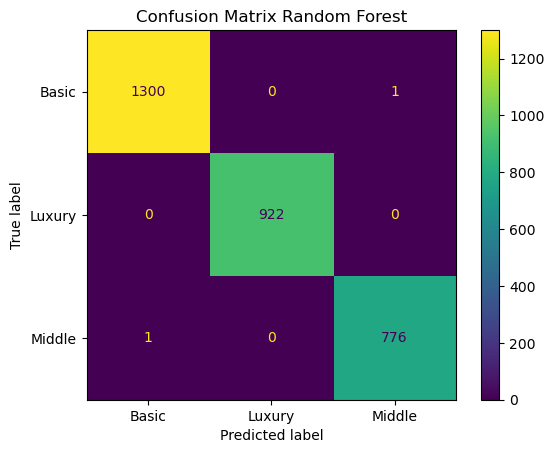

              precision    recall  f1-score   support

       Basic       1.00      1.00      1.00      1301
      Luxury       1.00      1.00      1.00       922
      Middle       1.00      1.00      1.00       777

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [13]:
print("CV SCORE : {}", format(GSCV_RF_SP.best_score_))

print("Test Score : {}", format(GSCV_RF_SP.best_estimator_.score(x_test_enc, y_test)))

print("Best Model : ",GSCV_RF_SP.best_estimator_)

mask = GSCV_RF_SP.best_estimator_.named_steps['feature select'].get_support()
print("Selected Feature : ",df_train_enc.columns[mask])

RF_pred = GSCV_RF_SP.predict(x_test_enc)

import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, RF_pred, labels=GSCV_RF_SP.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GSCV_RF_SP.classes_)
disp.plot()
plt.title("Confusion Matrix Random Forest")
plt.show()
print(classification_report(y_test, RF_pred))

In [14]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

pipe_RF = [('data scaling', StandardScaler()),
           ('feature select', SelectKBest()),
           ('clf', RandomForestClassifier(random_state=83, class_weight='balanced'))]

params_grid_RF = [{
                'data scaling': [StandardScaler()],
                'feature select__k': np.arange(2, 6),
                'clf__max_depth': np.arange(4, 5),
                'clf__n_estimators': [100, 150]
                },
                {
                'data scaling': [MinMaxScaler()],
                'feature select__k': np.arange(2, 6),
                'clf__max_depth': np.arange(4, 5),
                'clf__n_estimators': [100, 150]
                }]

estimator_RF = Pipeline(pipe_RF)
SKF = StratifiedKFold(n_splits=5, shuffle=True, random_state=83)
GSCV_RF_SKB = GridSearchCV(estimator_RF, params_grid_RF, cv=SKF)
GSCV_RF_SKB.fit(x_train_enc, y_train)
print("Finished")

Finished


CV SCORE : {} 0.9365714285714286
Test Score : {} 0.932
Best Model :  Pipeline(steps=[('data scaling', StandardScaler()),
                ('feature select', SelectKBest(k=2)),
                ('clf',
                 RandomForestClassifier(class_weight='balanced', max_depth=4,
                                        random_state=83))])
Selected Feature :  Index(['onehotencoder__haspool_no', 'remainder__squaremeters'], dtype='object')


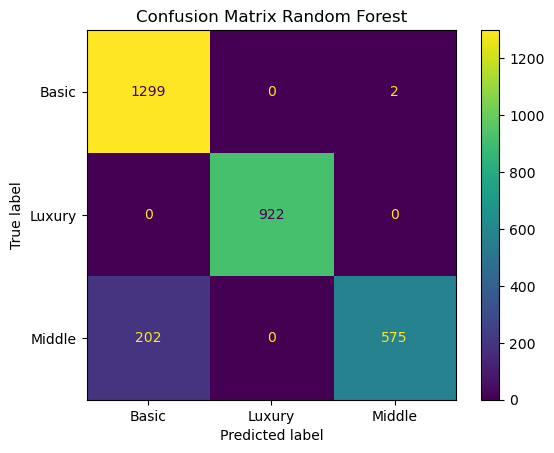

              precision    recall  f1-score   support

       Basic       0.87      1.00      0.93      1301
      Luxury       1.00      1.00      1.00       922
      Middle       1.00      0.74      0.85       777

    accuracy                           0.93      3000
   macro avg       0.95      0.91      0.93      3000
weighted avg       0.94      0.93      0.93      3000



In [16]:
print("CV SCORE : {}", format(GSCV_RF_SKB.best_score_))

print("Test Score : {}", format(GSCV_RF_SKB.best_estimator_.score(x_test_enc, y_test)))

print("Best Model : ",GSCV_RF_SKB.best_estimator_)

mask = GSCV_RF_SKB.best_estimator_.named_steps['feature select'].get_support()
print("Selected Feature : ",df_train_enc.columns[mask])

RF_pred = GSCV_RF_SKB.predict(x_test_enc)

import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, RF_pred, labels=GSCV_RF_SKB.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GSCV_RF_SKB.classes_)
disp.plot()
plt.title("Confusion Matrix Random Forest")
plt.show()
print(classification_report(y_test, RF_pred))

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

pipe_LR = Pipeline(steps=[
    ('scale', MinMaxScaler()),
    ('feat_select', SelectKBest()),
    ('clf', LogisticRegression(solver='liblinear', max_iter=10000))
])

params_grid_LR = [
    {
        'scale': [MinMaxScaler()],
        'feat_select__k': np.arange(2, 6),
        'clf__C': [0.0001, 0.01, 0.1, 1, 10],
        'clf__penalty': ['l1', 'l2']
    },
    {
        'scale': [StandardScaler()],
        'feat_select__k': np.arange(2, 6),
        'clf__C': [0.0001, 0.01, 0.1, 1, 10],
        'clf__penalty': ['l1', 'l2']
    }
]

GSCV_LR_SKB = GridSearchCV(pipe_LR, params_grid_LR, cv=StratifiedKFold(n_splits=5))
GSCV_LR_SKB.fit(x_train_enc, y_train)
print("Finished")

Finished


CV SCORE : {} 0.8700000000000001
Test Score : {} 0.87
Best Model : {} Pipeline(steps=[('scale', StandardScaler()), ('feat_select', SelectKBest(k=4)),
                ('clf',
                 LogisticRegression(C=10, max_iter=10000, penalty='l1',
                                    solver='liblinear'))])
Selected Feature : {} Index(['onehotencoder__haspool_no', 'onehotencoder__haspool_yes',
       'onehotencoder__isnewbuilt_new', 'remainder__squaremeters'],
      dtype='object')


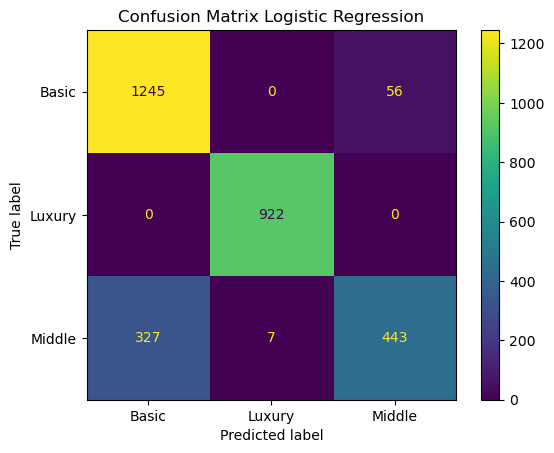

              precision    recall  f1-score   support

       Basic       0.79      0.96      0.87      1301
      Luxury       0.99      1.00      1.00       922
      Middle       0.89      0.57      0.69       777

    accuracy                           0.87      3000
   macro avg       0.89      0.84      0.85      3000
weighted avg       0.88      0.87      0.86      3000



In [19]:
mask = GSCV_LR_SKB.best_estimator_.named_steps['feat_select'].get_support()
print("CV SCORE : {}",format(GSCV_LR_SKB.best_score_))
print("Test Score : {}",format(GSCV_LR_SKB.best_estimator_.score(x_test_enc, y_test)))

print("Best Model : {}",format(GSCV_LR_SKB.best_estimator_))
print("Selected Feature : {}",format(df_train_enc.columns[mask]))

LR_pred = GSCV_LR_SKB.predict(x_test_enc)

import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, LR_pred, labels=GSCV_LR_SKB.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GSCV_LR_SKB.classes_)
disp.plot()
plt.title("Confusion Matrix Logistic Regression")
plt.show()

print(classification_report(y_test, LR_pred))


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectPercentile
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

pipe_LR = Pipeline(steps=[
    ('scale', MinMaxScaler()),
    ('feat_select', SelectPercentile()),
    ('clf', LogisticRegression(solver='liblinear', max_iter=10000))
])

params_grid_LR = [
    {
        'scale': [MinMaxScaler()],
        'feat_select__percentile': np.arange(10, 100, 10),
        'clf__C': [0.0001, 0.01, 0.1, 1, 10],
        'clf__penalty': ['l1', 'l2']
    },
    {
        'scale': [StandardScaler()],
        'feat_select__percentile': np.arange(10, 100, 10),
        'clf__C': [0.0001, 0.01, 0.1, 1, 10],
        'clf__penalty': ['l1', 'l2']
    }
]

GSCV_LR_SP = GridSearchCV(pipe_LR, params_grid_LR, cv=StratifiedKFold(n_splits=5))
GSCV_LR_SP.fit(x_train_enc, y_train)
print("Finished")

Finished


CV SCORE : {} 0.8734285714285714
Test Score : {} 0.8823333333333333
Best Model : {} Pipeline(steps=[('scale', StandardScaler()),
                ('feat_select', SelectPercentile(percentile=30)),
                ('clf',
                 LogisticRegression(C=10, max_iter=10000, penalty='l1',
                                    solver='liblinear'))])
Selected Feature : {} Index(['onehotencoder__hasyard_no', 'onehotencoder__haspool_no',
       'onehotencoder__haspool_yes', 'onehotencoder__isnewbuilt_new',
       'onehotencoder__isnewbuilt_old', 'remainder__squaremeters'],
      dtype='object')


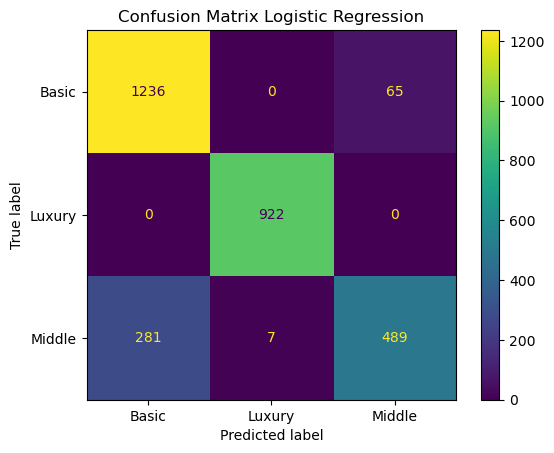

              precision    recall  f1-score   support

       Basic       0.81      0.95      0.88      1301
      Luxury       0.99      1.00      1.00       922
      Middle       0.88      0.63      0.73       777

    accuracy                           0.88      3000
   macro avg       0.90      0.86      0.87      3000
weighted avg       0.89      0.88      0.88      3000



In [21]:
mask = GSCV_LR_SP.best_estimator_.named_steps['feat_select'].get_support()
print("CV SCORE : {}",format(GSCV_LR_SP.best_score_))
print("Test Score : {}",format(GSCV_LR_SP.best_estimator_.score(x_test_enc, y_test)))

print("Best Model : {}",format(GSCV_LR_SP.best_estimator_))
print("Selected Feature : {}",format(df_train_enc.columns[mask]))

LR_pred = GSCV_LR_SP.predict(x_test_enc)

import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, LR_pred, labels=GSCV_LR_SP.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GSCV_LR_SP.classes_)
disp.plot()
plt.title("Confusion Matrix Logistic Regression")
plt.show()

print(classification_report(y_test, LR_pred))


In [23]:
import pickle

with open('model_RF.pkl', 'wb') as file:
    pickle.dump(GSCV_RF_SP, file)

In [ ]:
import sklearn
print(sklearn.__version__)


1.4.2
